In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<br><br>

### General aspects of the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
df[df['Type 2'].isnull()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


<br><br>

#### Studing Categorical features

In [7]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [8]:
df['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [9]:
df.Name.duplicated().sum()

0

<br><br>

The name don't represent some relevant information 

In [10]:
df.drop(columns=['Name'], inplace=True)
df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,Psychic,Dark,680,80,160,60,170,130,80,6,True


<br><br>

The column # is the number of the pokemon in the pokedex

In [11]:
df['#']

0        1
1        2
2        3
3        3
4        4
      ... 
795    719
796    719
797    720
798    720
799    721
Name: #, Length: 800, dtype: int64

In [12]:
df.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [13]:
df.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

<br><br>

### Functions for data visualisation

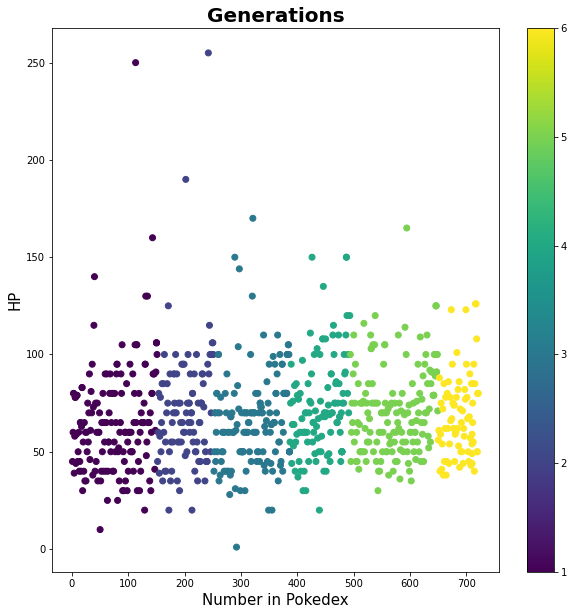

In [14]:
def plot_generation(df):
    plt.figure(figsize=(10,10))

    plt.scatter(df['#'], df['HP'], c=df.Generation)
    plt.colorbar()
    plt.title('Generations', fontdict={'fontsize':20, 'fontweight':1000})
    plt.xlabel('Number in Pokedex', fontdict={'fontsize':15})
    plt.ylabel('HP', fontdict={'fontsize':15})

    plt.show()

plot_generation(df)

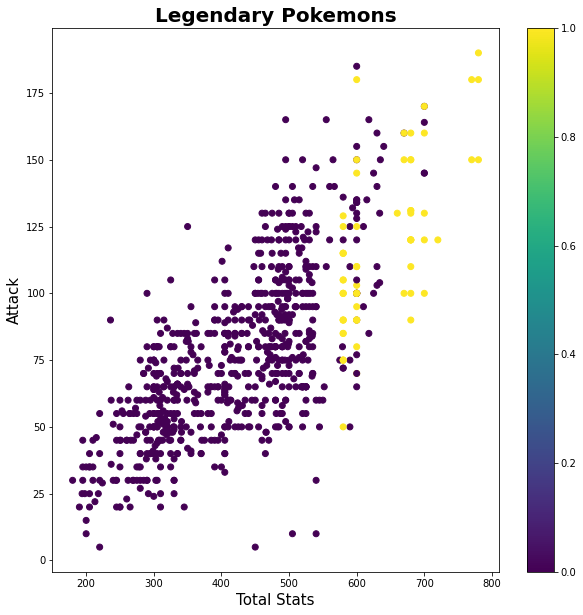

In [15]:
def plot_legendary(df):
    plt.figure(figsize=(10,10))

    plt.scatter(df['Total'], df['Attack'], c=df.Legendary)
    plt.colorbar()
    plt.title('Legendary Pokemons', fontdict={'fontsize':20, 'fontweight':1000})
    plt.xlabel('Total Stats', fontdict={'fontsize':15})
    plt.ylabel('Attack', fontdict={'fontsize':15})

    plt.show()

plot_legendary(df)

<br><br>
#### Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
type1_encoder = LabelEncoder()
df['Type 1'] = type1_encoder.fit_transform(df['Type 1'])

In [18]:
df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,9,Poison,318,45,49,49,65,65,45,1,False
1,2,9,Poison,405,60,62,63,80,80,60,1,False
2,3,9,Poison,525,80,82,83,100,100,80,1,False
3,3,9,Poison,625,80,100,123,122,120,80,1,False
4,4,6,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,15,Fairy,600,50,100,150,100,150,50,6,True
796,719,15,Fairy,700,50,160,110,160,110,110,6,True
797,720,14,Ghost,600,80,110,60,150,130,70,6,True
798,720,14,Dark,680,80,160,60,170,130,80,6,True


In [19]:
type2_encoder = LabelEncoder()
df['Type 2'] = type2_encoder.fit_transform(df['Type 2'])

In [20]:
df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,9,13,318,45,49,49,65,65,45,1,False
1,2,9,13,405,60,62,63,80,80,60,1,False
2,3,9,13,525,80,82,83,100,100,80,1,False
3,3,9,13,625,80,100,123,122,120,80,1,False
4,4,6,18,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,15,4,600,50,100,150,100,150,50,6,True
796,719,15,4,700,50,160,110,160,110,110,6,True
797,720,14,8,600,80,110,60,150,130,70,6,True
798,720,14,1,680,80,160,60,170,130,80,6,True


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   #           800 non-null    int64
 1   Type 1      800 non-null    int32
 2   Type 2      800 non-null    int32
 3   Total       800 non-null    int64
 4   HP          800 non-null    int64
 5   Attack      800 non-null    int64
 6   Defense     800 non-null    int64
 7   Sp. Atk     800 non-null    int64
 8   Sp. Def     800 non-null    int64
 9   Speed       800 non-null    int64
 10  Generation  800 non-null    int64
 11  Legendary   800 non-null    bool 
dtypes: bool(1), int32(2), int64(9)
memory usage: 63.4 KB


<br><br>

### Aplication of the Class-Balancing algorithms

<br>

### For Column Legendary

#### Correlation

In [22]:
df.corr()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,-0.095139,-0.108927,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Type 1,-0.095139,1.000000,0.000646,0.023251,0.094230,-0.037525,0.103439,-0.006694,0.018911,-0.066471,-0.101129,-0.010162
Type 2,-0.108927,0.000646,1.000000,-0.190463,-0.092818,-0.169240,-0.085407,-0.142016,-0.106041,-0.162559,-0.101504,-0.087771
Total,0.119813,0.023251,-0.190463,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.094230,-0.092818,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,-0.037525,-0.169240,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.103439,-0.085407,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,-0.006694,-0.142016,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.018911,-0.106041,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,-0.066471,-0.162559,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715


In [23]:
df.Legendary.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, random_state=42)

<br>

#### SMOTE

In [25]:
from crucio.SMOTE import SMOTE

smote = SMOTE()
balanced_df = smote.balance(df, 'Legendary')

In [26]:
balanced_df.Legendary.value_counts()

True     735
False    735
Name: Legendary, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

def test_model(df):
    train_df, test_df = train_test_split(df, random_state=42)
    model = LogisticRegression(random_state=1)
    model.fit(train_df[train_df.columns[:-1]], train_df[train_df.columns[-1]])
    print(accuracy_score(model.predict(test_df[test_df.columns[:-1]]), test_df[test_df.columns[-1]]))
    print(confusion_matrix(model.predict(test_df[test_df.columns[:-1]]), test_df[test_df.columns[-1]]))

In [28]:
test_model(df)

0.9
[[176   9]
 [ 11   4]]


In [29]:
test_model(balanced_df)

0.7717391304347826
[[125  25]
 [ 59 159]]


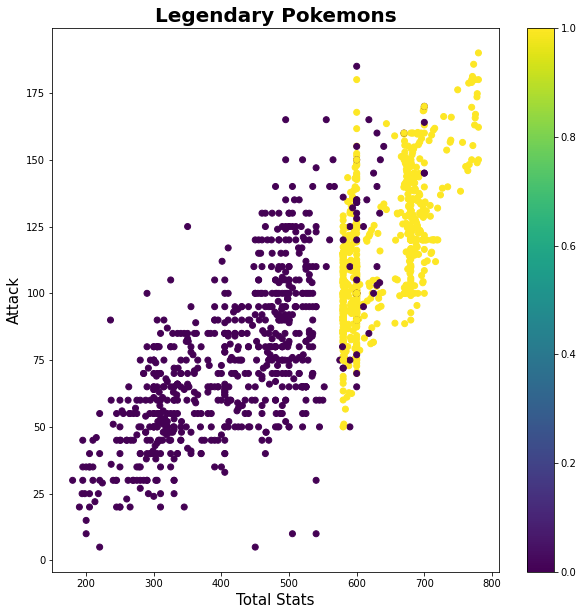

In [30]:
plot_legendary(balanced_df)

<br>

#### SMOTEEN

In [31]:
from crucio.SMOTEENN import SMOTEENN

smoteen = SMOTEENN()
smoteen_df = smoteen.balance(df, 'Legendary')

In [32]:
smoteen_df.Legendary.value_counts()

True     732
False    719
Name: Legendary, dtype: int64

In [33]:
test_model(smoteen_df)

0.7851239669421488
[[134  34]
 [ 44 151]]


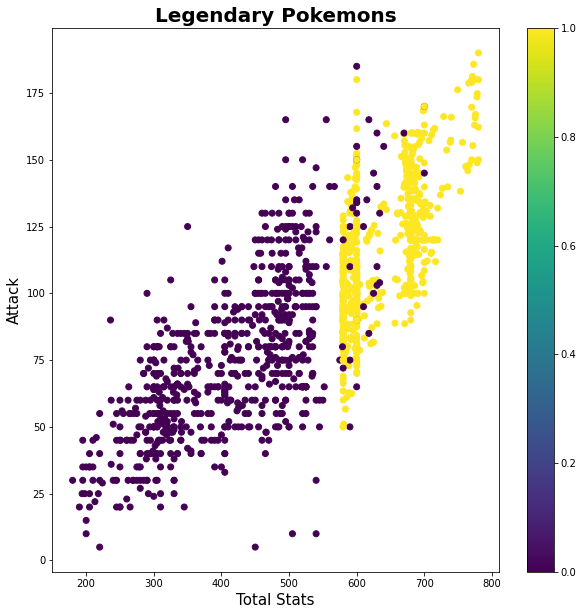

In [34]:
plot_legendary(smoteen_df)

<br>

#### ICOTE

In [35]:
from crucio.ICOTE import ICOTE

icote = ICOTE()
icote_df = icote.balance(df, 'Legendary')

In [36]:
icote_df.Legendary.value_counts()

False    735
True     735
Name: Legendary, dtype: int64

In [37]:
test_model(icote_df)

0.904891304347826
[[151  17]
 [ 18 182]]


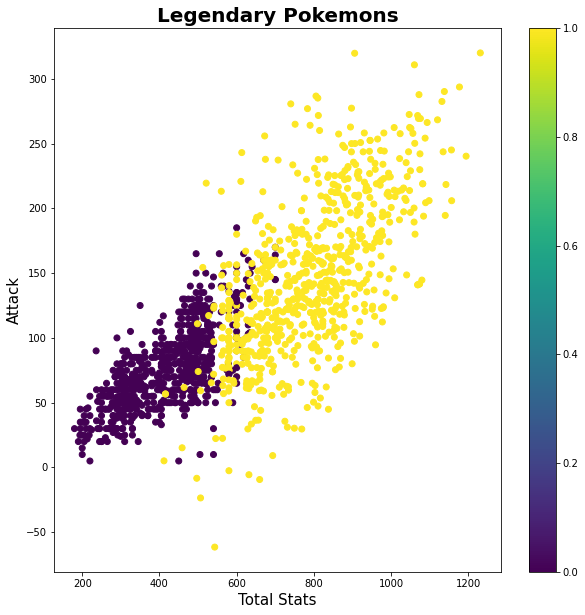

In [38]:
plot_legendary(icote_df)

<br>

#### TKRKNN

In [39]:
from crucio.TKRKNN import TKRKNN

tk = TKRKNN()
tk_df = tk.balance(df, 'Legendary')

In [40]:
tk_df.Legendary.value_counts()

False    735
True     735
Name: Legendary, dtype: int64

In [41]:
test_model(tk_df)

0.904891304347826
[[145  11]
 [ 24 188]]


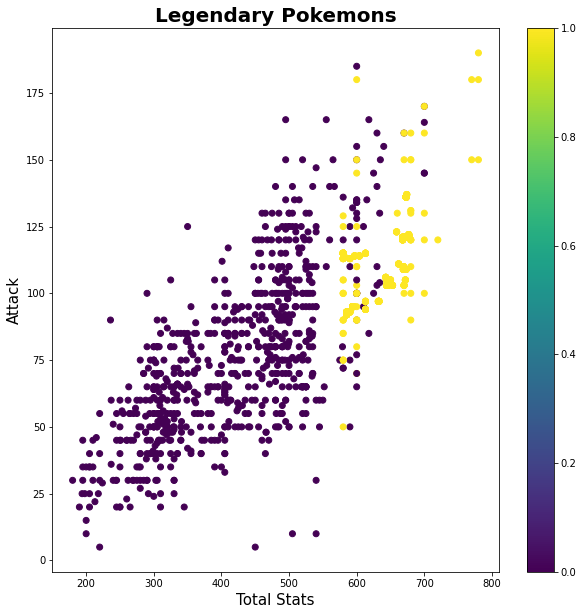

In [42]:
plot_legendary(tk_df)

<br><br>

### For Columns Generation

In [43]:
def test2_model(df):
    train_df, test_df = train_test_split(df, random_state=42)
    model = LogisticRegression(random_state=1)
    model.fit(train_df.drop(columns=['Generation']), train_df[['Generation']])
    print(accuracy_score(model.predict(test_df.drop(columns=['Generation'])), test_df[['Generation']]))
    print(confusion_matrix(model.predict(test_df.drop(columns=['Generation'])), test_df[['Generation']]))

In [44]:
test2_model(df)

0.67
[[37  3  0  0  0  0]
 [ 1 15  2  0  0  0]
 [ 0  7 27  5  0  0]
 [ 0  0  9 15  7  0]
 [ 0  0  3  5 28 11]
 [ 0  0  0  1 12 12]]


<br>

#### SMOTE

In [45]:
from crucio.SMOTE import SMOTE

smote = SMOTE()
balanced_df = smote.balance(df, 'Generation')

In [46]:
test2_model(balanced_df)

0.7028112449799196
[[50  3  0  0  0  0]
 [ 4 28  6  0  0  0]
 [ 0  5 27  2  0  0]
 [ 0  0  8 19  7  0]
 [ 0  0  4 12 23 14]
 [ 0  0  0  0  9 28]]


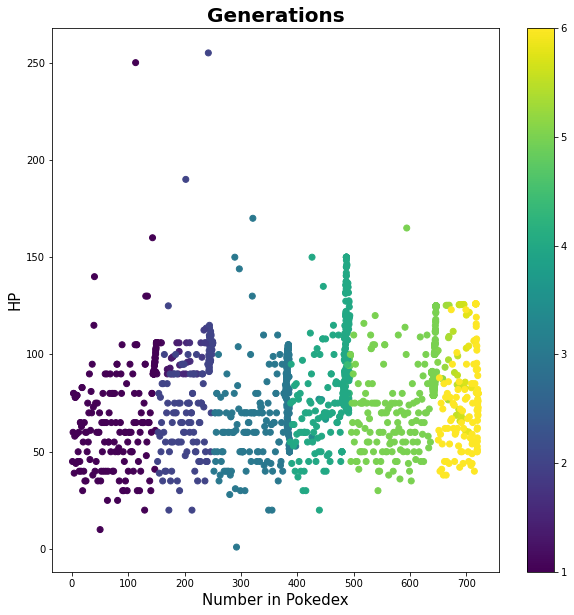

In [47]:
plot_generation(smoteen_df)